
Le travail rendu par :
*  Mohamed Amine SOUIDI 181831044438   G2
*  Imad Eddine DJEKOUNE 181831089663   G2

# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# données
data = np.genfromtxt('/content/drive/MyDrive/AARN/TP03/data.csv', delimiter=',')
data.shape


(100, 3)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

Text(0, 0.5, 'Bénéfice x1000')

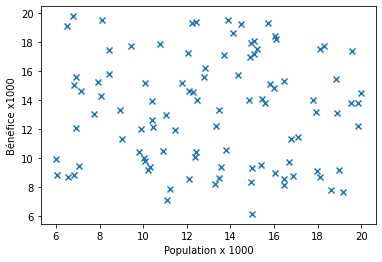

In [ ]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def initialisation(parametre):
 
  return np.zeros((parametre,1))
print(initialisation(2))

[[0.]
 [0.]]


In [ ]:
def model(X,theta):
  return X.dot(theta)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1+np.exp(-z))

In [ ]:
def modelNonVect(A,B):
  result = [] # final result
  for i in range(len(A)):

      row = [] # the new row in new matrix
      for j in range(len(B[0])):
          
          product = 0 # the new element in the new row
          for v in range(len(A[i])):
              product += A[i][v] * B[v][j]
          row.append(product) # append sum of product into the new row
          
      result.append(row) # append the new row into the final result
  return result


In [ ]:
import time

def computeCostNonVect(X, y, theta):
    
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    m = len(y)
    s = 0 
    for i in range(len(X)):
      s = s + (modelNonVect(X,theta)[i]-y[i])**2
    
    return 1/(2*m) * s 


def computeCost(X, y, theta):
  m = len(y)
  return 1/(2*m) * np.sum((model(X,theta)-y)**2)
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement

theta = initialisation(2)
start = time.time()
print()
#print(computeCost(X,y,theta))
end = time.time()
print("avec vectorisation : "+ str((end-start)*1000)+' ms')
start = time.time()
#print(computeCostNonVect(X, y, theta))
print()
end = time.time()
print("sans vectorisation : "+ str((end-start)*1000)+' ms')
 


avec vectorisation : 0.12159347534179688 ms

sans vectorisation : 0.0667572021484375 ms


le traitement de cout avec vectorisation  plus rapide  de traitement sans vectorisation "presque le double"

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:

def grad(X, y, theta):
  m=len(y)
  z = model(X,theta)
  return 1/m * X.T.dot(Sigmoid(z)-y)


def gradientDescent(X, y, theta, alpha , iterations = 100):
    cost  = np.zeros(iterations)
    cout = []
   
    for i in range(0, iterations):
      
      theta = theta - alpha * grad(X,y,theta)
      
      cost[i]= computeCost(X,y,theta)
      # pour le courbe 
      #cout pour tracer cout par rapport a theta0 et theta1
      cout.append([float(theta[0]),float(theta[1]),cost[i]])
    return theta ,cost ,cout

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
theta = initialisation(3) 
theta.shape

(3, 1)

Calculer le cout initial

0.3


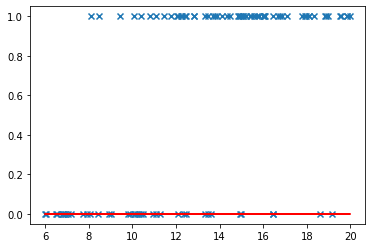

In [ ]:
#cout initial
y = np.reshape(y,(100,1))
initialCost=computeCost(X, y, theta)
print(initialCost)
#test Model
plt.scatter(X[:,1],y,marker ='x')
plt.plot(X[:,1],modelNonVect(X,theta),c='r')


Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 5000;
alpha = 0.01;
# Appel
#print(model(X,theta).shape)
theta_ , cost ,cout  = gradientDescent(X,y,theta  ,alpha,iterations)
#print(cout[0][0])
#tt = gradientDescent(X, y, theta, alpha, iterations)
print('theta = ',theta_)


theta =  [[-2.84212435]
 [ 0.15323139]
 [ 0.11346886]]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

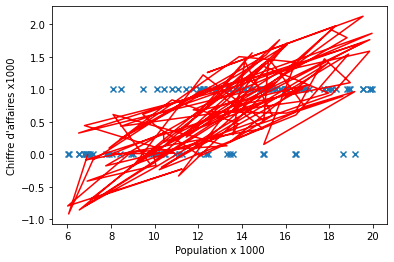

In [ ]:
y_pred=np.matmul(X,theta_)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1],y_pred, c ='red')
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

[6.73719046 5.93159357 5.90115471 ... 4.4769714  4.4769714  4.4769714 ]


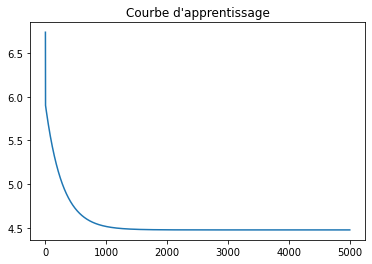

In [ ]:
plt.title("Courbe d'apprentissage")
plt.plot(range(5000),cost)
print(cost)

# **3D**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d

# defining all 3 axes
nbIter = 1500
x_ = np.zeros((nbIter+1))
y_ = np.zeros((nbIter+1))

theta = np.zeros((2, 1))

for i in range(0,nbIter+1):
  x_[i] = (theta[0])
  y_[i] = (theta[1])
  theta, cost ,cout = gradientDescent(X, y, theta, alpha, 1)

x_ = x_[1:len(x_)]
y_ = y_[1:len(y_)]

x_ = np.array([x_[i] for i in range(0,1500,5)])
y_ = np.array([y_[i] for i in range(0,1500,5)])

x_grid = np.zeros((x_.shape[0],x_.shape[0]))
y_grid = np.zeros((y_.shape[0],y_.shape[0]))
z_grid = np.zeros((y_.shape[0],y_.shape[0]))

for i in range(len(x_grid)):
  for j in range(len(x_grid)):
    x_grid[i][j] = x_[i]
    y_grid[j][i] = y_[i]


for i in range(len(x_grid)):
  for j in range(len(x_grid)):
    z_grid[i][j] = computeCost(X, y, [ x_grid[i][j] ,  y_grid[i][j] ])

output = plt.subplot(111, projection = '3d')   # 3d projection
output.view_init(30, 60)
output.plot_surface(x_grid, y_grid, z_grid, rstride = 2, cstride = 2, cmap = plt.cm.Reds_r)
output.set_xlabel('theta0')                         # axis label
output.set_xlabel('theta1')
output.set_xlabel('cout')
plt.show()

ValueError: ignored

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d

# defining all 3 axes
nbIter = 1500
x_ = np.zeros((nbIter+1))
y_ = np.zeros((nbIter+1))

theta = np.zeros((2, 1))

for i in range(0,nbIter+1):
  x_[i] = (theta[0])
  y_[i] = (theta[1])
  theta, cost ,cout = gradientDescent(X, y, theta, alpha, 1)

x_ = x_[1:len(x_)]
y_ = y_[1:len(y_)]

x_ = np.array([x_[i] for i in range(0,1500,5)])
y_ = np.array([y_[i] for i in range(0,1500,5)])

x_grid = np.zeros((x_.shape[0],x_.shape[0]))
y_grid = np.zeros((y_.shape[0],y_.shape[0]))
z_grid = np.zeros((y_.shape[0],y_.shape[0]))

for i in range(len(x_grid)):
  for j in range(len(x_grid)):
    x_grid[i][j] = x_[i]
    y_grid[j][i] = y_[i]


for i in range(len(x_grid)):
  for j in range(len(x_grid)):
    z_grid[i][j] = computeCost(X, y, [ x_grid[i][j] ,  y_grid[i][j] ])

output = plt.subplot(111, projection = '3d')   # 3d projection
output.view_init(30, 60)
output.plot_surface(x_grid, y_grid, z_grid, rstride = 2, cstride = 2, cmap = plt.cm.Reds_r)
output.set_xlabel('theta0')                         # axis label
output.set_xlabel('theta1')
output.set_xlabel('cout')
plt.show()

ValueError: ignored

In [ ]:
# The function J
def J(theta0, theta1, x, y, m):
    J = 0
    for i in range(m):
        J += ((theta0 + theta1*x[i]) - y[i] )**2
    return J


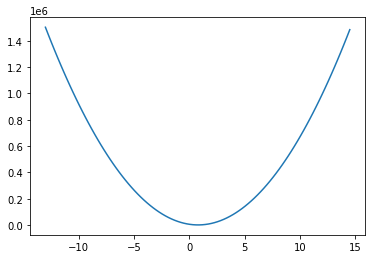

In [ ]:
a = np.linspace(-13,14.5,100)
plt.plot(a, J(0.1,a,X[:,1],y,m=len(X)) ) 

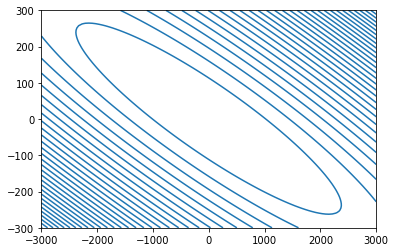

In [ ]:
a0 = np.linspace(-3000,3000, 100)
a1 = np.linspace(-300,300, 100)
aa0, aa1 = np.meshgrid(a0, a1)
plt.contour(aa0,aa1,0.00000001*J(aa0,aa1,X[:,1],y,m=len(X)) , colors='C0', levels=[i for i in np.arange(0,800,1)])

Prédire des valeurs de y

In [ ]:
#fonction qui calcule le score coeficient de determination 
def evaluation(y,y_pred):
  u = ((y-y_pred)**2).sum()
  v= ((y-y.mean())**2).sum()
  return 1- u/v
evaluation(y,y_pred)

0.7020315523859602

In [ ]:
theta_

array([[-3.89530051],
       [ 1.19298539]])

In [ ]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta_);
predict1


array([0.28014834])

In [ ]:
predict2 = np.matmul([1, 7],theta_);
predict2

array([4.45559719])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
import pandas as pd
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')
dataMulti.shape
dataMulti = pd.DataFrame(dataMulti)
dataMulti

,0,1,2
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0
5,1985.0,4.0,299900.0
6,1534.0,3.0,314900.0
7,1427.0,3.0,199000.0
8,1380.0,3.0,212000.0
9,1494.0,3.0,242500.0


Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y
y = dataMulti.iloc[0:,2]
y = np.array(y )
X = np.ones((47,3))
X_ = dataMulti.iloc[0:,0:2]
for i in range (len(X)):
  X[i][1]=X_[0][i]
  X[i][2]=X_[1][i]


X.astype(int)


array([[   1, 2104,    3],
       [   1, 1600,    3],
       [   1, 2400,    3],
       [   1, 1416,    2],
       [   1, 3000,    4],
       [   1, 1985,    4],
       [   1, 1534,    3],
       [   1, 1427,    3],
       [   1, 1380,    3],
       [   1, 1494,    3],
       [   1, 1940,    4],
       [   1, 2000,    3],
       [   1, 1890,    3],
       [   1, 4478,    5],
       [   1, 1268,    3],
       [   1, 2300,    4],
       [   1, 1320,    2],
       [   1, 1236,    3],
       [   1, 2609,    4],
       [   1, 3031,    4],
       [   1, 1767,    3],
       [   1, 1888,    2],
       [   1, 1604,    3],
       [   1, 1962,    4],
       [   1, 3890,    3],
       [   1, 1100,    3],
       [   1, 1458,    3],
       [   1, 2526,    3],
       [   1, 2200,    3],
       [   1, 2637,    3],
       [   1, 1839,    2],
       [   1, 1000,    1],
       [   1, 2040,    4],
       [   1, 3137,    3],
       [   1, 1811,    4],
       [   1, 1437,    3],
       [   1, 1239,    3],
 

In [ ]:
theta = initialisation(3)
alpha = 0.01
iteration = 1000
y =np.reshape(y,(47,1))
X.shape

(47, 3)

# ***Application de gradient descent avant la normalisation des données***

***Appliquer la descente du gradient à plusieurs variables***

In [ ]:
import datetime

theta = np.zeros((3, 1)) # initialement a 0

def gradientDescent_multi_test(X, y, theta, alpha, iterations):
  a = datetime.datetime.now().replace(microsecond=0)
  m = len(y)
  t = np.copy(theta)

  for i in range(iterations):
    if (i%1000000 == 0):
      b = datetime.datetime.now().replace(microsecond=0)
      print("iter {0} , cost : {1} , t : [{2},{3},{4}] , temps pris : {5}".format(i,computeCost(X, y,t),t[0][0],t[1][0],t[2][0],(b-a)))
    y_pred = np.transpose(np.matmul(X,t))
    t[0] = t[0] - (alpha * ((1/m) * np.sum(y_pred - y)))
    t[1] = t[1] - (alpha * ((1/m) * np.sum((y_pred - y) * X[:,1])))
    t[2] = t[2] - (alpha * ((1/m) * np.sum((y_pred - y) * X[:,2])))

  print("temps pris (sans normalisation) : {0}".format(b-a))
  return t

theta_NoMin = gradientDescent_multi_test(X, y, theta, 0.0000004328, 300000000)


iter 0 , cost : 6015548808460000.0 , t : [0.0,0.0,0.0] , temps pris : 0:00:00
iter 1000000 , cost : 2888226946933.582 , t : [3644.3608433536265,155.63526951472596,5656.669426300377] , temps pris : 0:00:39
iter 2000000 , cost : 1943653179296.7524 , t : [6561.840331968702,149.4824189946344,9042.091091127733] , temps pris : 0:01:17
iter 3000000 , cost : 1427115493750.943 , t : [9007.456834284058,145.5993859364839,10997.428898090404] , temps pris : 0:01:56
iter 4000000 , cost : 1127918832886.991 , t : [11142.463565935193,143.14954796435944,12053.589112841315] , temps pris : 0:02:35
iter 5000000 , cost : 944514590622.44 , t : [13068.946806604858,141.6046346000072,12545.723483654696] , temps pris : 0:03:13
iter 6000000 , cost : 825558185108.9861 , t : [14851.627278345915,140.6310790639329,12685.379482443506] , temps pris : 0:03:52
iter 7000000 , cost : 743855736513.5884 , t : [16531.626383100564,140.01825699578,12606.058348650371] , temps pris : 0:04:31
iter 8000000 , cost : 684398458445.430

array([[89451.72930253],
       [  139.21013056],
       [-8693.78879307]])

***Comparaison avec sklearn*** 

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X[:,1:3], y)
print('Resultat de sklearn : ')
print('Intercept    : (theta 0) ', regr.intercept_[0])
print('Coefficients : (theta 1) ', regr.coef_[0][0])
print('Coefficients : (theta 2) ', regr.coef_[0][1])


print('Notre resultat array : ')
print('theta 0 : ',theta_NoMin[0][0])
print('theta 1 : ',theta_NoMin[1][0])
print('theta 2 : ',theta_NoMin[2][0])

Resultat de sklearn : 
Intercept    : (theta 0)  89597.76596099924
Coefficients : (theta 1)  139.2106346503416
Coefficients : (theta 2)  -8737.915420187152
Notre resultat array : 
theta 0 :  89451.72930253
theta 1 :  139.21013056
theta 2 :  -8693.78879307


# ***Application de gradient descent avec la normalisation des données***

In [ ]:

def standard(arr):
  return (arr-arr.mean())/arr.std()

def minmax(arr):
  new_arr = (arr - arr.min())/(arr.max()-arr.min())
  return new_arr


**Mise à l'échelle des données**

In [ ]:
X_MinMax =X
X_MinMax[:,1] = minmax(X[:,1])
X_MinMax[:,2] = minmax(X[:,2])
X_MinMax

**Normalisation des données en moyenne = 0**

In [ ]:
X_stand = X
X_stand[:,1] = standard(X_MinMax[:,1])
X_stand[:,2] = standard(X_MinMax[:,2])
X_stand

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

***Appliquer la descente du gradient à plusieurs variables***

In [ ]:
theta = initialisation(3)
theta_ , cost ,cout  = gradientDescent(X_stand,y,theta  ,0.1, 9000)
theta_

array([[340412.76595745],
       [109447.76551898],
       [ -6578.27679028]])

***Comparaison avec sklearn*** 

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_stand[:,1:3], y)

print('Resultat de sklearn : ')
print('Intercept    : (theta 0) ', regr.intercept_[0])
print('Coefficients : (theta 1) ', regr.coef_[0][0])
print('Coefficients : (theta 2) ', regr.coef_[0][1])


print('Notre resultat array : ')
print('theta 0 : ',theta_[0][0])
print('theta 1 : ',theta_[1][0])
print('theta 2 : ',theta_[2][0])


Resultat de sklearn : 
Intercept    : (theta 0)  340412.76595744677
Coefficients : (theta 1)  109447.76551898006
Coefficients : (theta 2)  -6578.276790278803
Notre resultat array : 
theta 0 :  340412.76595744654
theta 1 :  109447.76551897996
theta 2 :  -6578.276790278744


# ***Evaluation de Notre Model***

***Avec Normalisation***

In [ ]:
y_pred=np.matmul(X_stand,theta_)
s1 = evaluation(y,y_pred)
s2 = regr.score(X_stand[:,1:3],y)
print("notre score : {0}".format(s1))
print("sklearn score : {0}".format(s2))

notre score : 0.7329450119546197
sklearn score : 0.7329450119546197


***Sans Normalisation***

In [ ]:
y_pred=np.matmul(X,theta_NoMin)
s1 = evaluation(y,y_pred)
s2 = regr.score(X[:,1:3],y)
print("notre score : {0}".format(s1))
print("sklearn score : {0}".format(s2))

notre score : 0.7329449374434782
sklearn score : 0.7329450119546197


**Comparer la descente du gradient avec et sans normalisation**
- **Exemple**: voir la difference dans le temps de calcul

In [ ]:
#pour la comparaison des deux methode l'evaluation précédant montre que la methode 
#qui fait la normalisation donne des mielleurs resultat avec un temps reduit

#sans normalisation : temps pris : 3:10:49 
#avec normalisation : temps pris : 0:01


# Renforcement d'apprentissage
**l'idee c'est : **

bon madame avec normalisation c'est presque en ms .. l'apprentissage est très rapide (et on a eu le même résultat avec les autres libraries ) .. mais sans la normalisation 😅 ça pris 3:10:49s (300000000 iterations) pour avoir :


*   thêta : [ 89448.59,139.21,-8692.84 ] 
*   cost :  2772196
*   alpha : 0.0000004328



les résultats obtenues du coefficients de thêta sont proche du résultat de sklearn mais sa pris beaucoup de temps et c'est pas le résultat exact ( genre elle a pas convergé au bout ) 

donc après l'investigation , nous avons constaté que le problème c'était 'le alpha (Learning rates)' , il est très petit mais si on l'incrémente pour accélérer le processus la fonction diverge . 
et on a vu que theta1 varie lentement que theta0 et theta2 , donc on a **fais des alphas ( Learning rates ) différentes  pour chaque thêta** ,
a1 : 0.001 pour theta1 et theta2 , a2 : 0.0000001 theta1
voici le résultat avec multiples learning rates :
*  temps pris : 0:00:44
*  theta : [  89597.76,139.21,-8737.91  ] 
*  cost :  2.74 e-12

In [ ]:
def gradientDescent_multi_test_alpha(X, y, theta, alpha, iterations):
  a = datetime.datetime.now().replace(microsecond=0)
  m = len(y)
  t = np.copy(theta)

  for i in range(iterations):
    if (i%100000 == 0):
      b = datetime.datetime.now().replace(microsecond=0)
      print("iter {0} , cost : {1} , t : [{2},{3},{4}] , temps pris : {5}".format(i,computeCost(X, y,t),t[0][0],t[1][0],t[2][0],(b-a)))
    y_pred = np.transpose(np.matmul(X,t))
    t[0] = t[0] - (alpha[0] * ((1/m) * np.sum(y_pred - y)))
    t[1] = t[1] - (alpha[1] * ((1/m) * np.sum((y_pred - y) * X[:,1])))
    t[2] = t[2] - (alpha[2] * ((1/m) * np.sum((y_pred - y) * X[:,2])))


a = datetime.datetime.now().replace(microsecond=0)
t = gradientDescent_multi_test_alpha(X, y, theta, [0.001,0.0000001,0.001], 1000000)
b = datetime.datetime.now().replace(microsecond=0)
print("temps pris : {0}".format(b-a))

iter 0 , cost : 6015548808460000.0 , t : [0.0,0.0,0.0] , temps pris : 0:00:00
iter 100000 , cost : 49443819.939814 , t : [88967.80408012208,139.2084575351048,-8547.563659159016] , temps pris : 0:00:04
iter 200000 , cost : 2746.4131352407953 , t : [89593.0709004592,139.2106184244585,-8736.496742217809] , temps pris : 0:00:08
iter 300000 , cost : 0.15255263386010978 , t : [89597.73096905177,139.21063452941124,-8737.90484688259] , temps pris : 0:00:14
iter 400000 , cost : 8.47368622905291e-06 , t : [89597.76570020692,139.21063464944032,-8737.915341385116] , temps pris : 0:00:21
iter 500000 , cost : 4.682983433810393e-10 , t : [89597.76595905368,139.21063465033336,-8737.915419598214] , temps pris : 0:00:25
iter 600000 , cost : 2.7472364593178304e-12 , t : [89597.76596085784,139.21063465034257,-8737.915420145458] , temps pris : 0:00:29
iter 700000 , cost : 2.7472364593178304e-12 , t : [89597.76596085784,139.21063465034257,-8737.915420145458] , temps pris : 0:00:33
iter 800000 , cost : 2.747

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance